In [2]:
import os
os.getcwd()


'C:\\Users\\ralma\\OneDrive\\Desktop\\Pisa\\DATA MINING\\GERMANYAIRBNB'

In [3]:
import pandas as pd

path_listings = "data/listings.csv"
path_calendar = "data/calendar.csv"
path_reviews = "data/reviews.csv"

listings = pd.read_csv(path_listings)
calendar = pd.read_csv(path_calendar)
reviews = pd.read_csv(path_reviews)

print("Listings shape:", listings.shape)
print("Calendar shape:", calendar.shape)
print("Reviews shape:", reviews.shape)

listings.head()


C:\Users\ralma\AppData\Local\Temp\ipykernel_29028\1388006056.py:7: DtypeWarning: Columns (43,61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv(path_listings)


Listings shape: (11481, 106)
Calendar shape: (4190565, 7)
Reviews shape: (175562, 6)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36720,https://www.airbnb.com/rooms/36720,20191125094942,2019-11-25,"Beautiful 2 rooms flat, Glockenbach","Very quiet, yet centrally located 2 rooms apt....","2-Zimmer Altbauwohung Beste Lage, zentral, im ...","Very quiet, yet centrally located 2 rooms apt....",none,Glockenbachviertel area has the hippest restau...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.37
1,97945,https://www.airbnb.com/rooms/97945,20191125094942,2019-11-25,Deluxw-Apartm. with roof terrace,NaN,"We offer a modern, quiet apartment with a sunn...","We offer a modern, quiet apartment with a sunn...",none,We are living in a outskirt of Munich its call...,...,f,f,flexible,f,f,1,1,0,0,1.32
2,114695,https://www.airbnb.com/rooms/114695,20191125094942,2019-11-25,Apartment Munich/East with sundeck,NaN,It´s a quiet and sunny apartment close to the ...,It´s a quiet and sunny apartment close to the ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.52
3,127383,https://www.airbnb.com/rooms/127383,20191125094942,2019-11-25,City apartment next to Pinakothek,Die Wohnung hat 55 qm und ist voll ausgestatte...,My cosy apartment is located in the heart of M...,My cosy apartment is located in the heart of M...,none,NaN,...,f,f,flexible,t,f,2,1,1,0,0.79
4,157808,https://www.airbnb.com/rooms/157808,20191125094942,2019-11-25,"Near Olympia,English Garden",Kleines gemütliches Privat Zimmer mit Kabel TV...,Kleines gemütliches Privat Zimmer ca.14qm möbl...,Kleines gemütliches Privat Zimmer ca.14qm möbl...,none,"In der Nähe befinden sich einige Kaffees,Kneip...",...,f,f,moderate,f,f,1,0,1,0,NaN


In [4]:
listings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Columns: 106 entries, id to reviews_per_month
dtypes: float64(24), int64(21), object(61)
memory usage: 9.3+ MB


In [5]:
listings.columns.tolist()


['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [6]:
price_cols = [
    'price', 'weekly_price', 'monthly_price', 'security_deposit',
    'cleaning_fee', 'extra_people'
]

def clean_price(col):
    return (
        listings[col]
        .astype(str)
        .str.replace(r'[\$,]', '', regex=True)
        .replace('nan', None)
        .astype(float)
    )

for col in price_cols:
    listings[col] = clean_price(col)

listings[price_cols].head()


,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,95.0,800.0,NaN,100.0,30.0,30.0
1,80.0,450.0,1100.0,NaN,10.0,10.0
2,95.0,630.0,1950.0,500.0,60.0,40.0
3,120.0,NaN,NaN,NaN,28.0,0.0
4,35.0,250.0,500.0,100.0,10.0,15.0


In [7]:
date_cols = [
    'host_since', 'first_review', 'last_review',
    'last_scraped', 'calendar_last_scraped'
]

for col in date_cols:
    listings[col] = pd.to_datetime(listings[col], errors='coerce')

listings[date_cols].head()


,host_since,first_review,last_review,last_scraped,calendar_last_scraped
0,2010-07-05,2014-05-09,2017-07-22,2019-11-25,2019-11-25
1,2011-04-18,2011-10-03,2019-10-03,2019-11-25,2019-11-25
2,NaT,2011-07-08,2019-10-06,2019-11-25,2019-11-25
3,2011-05-26,2011-06-04,2019-07-21,2019-11-25,2019-11-25
4,2011-06-29,NaT,NaT,2019-11-25,2019-11-25


In [8]:
bool_cols = [
    'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
    'instant_bookable', 'is_business_travel_ready',
    'require_guest_profile_picture', 'require_guest_phone_verification'
]

for col in bool_cols:
    listings[col] = listings[col].map({'t': True, 'f': False})

listings[bool_cols].head()


,host_is_superhost,host_has_profile_pic,host_identity_verified,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification
0,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False
2,NaN,NaN,NaN,False,False,False,False
3,True,True,True,False,False,True,False
4,False,True,False,False,False,False,False


In [9]:
listings.iloc[:, [43, 61, 62, 94]].head()
print(listings.columns[43], listings.columns[61], listings.columns[62], listings.columns[94])


zipcode weekly_price monthly_price license


In [10]:
import numpy as np

# keep only first 5-digit sequences
listings['zipcode'] = (
    listings['zipcode']
    .astype(str)
    .str.extract(r'(\d{5})')      # extract 5 digits
)

# convert to string, keep NaN as is
listings['zipcode'] = listings['zipcode'].astype('string')

listings['zipcode'].value_counts(dropna=False).head(10)


zipcode
80469    551
80337    432
80339    431
81541    377
80636    280
80796    280
80336    271
80799    270
80333    270
80798    263
Name: count, dtype: Int64

In [11]:
listings['license'] = listings['license'].astype('string')


In [12]:
listings['zipcode'].value_counts(dropna=False).head(20)


zipcode
80469    551
80337    432
80339    431
81541    377
80636    280
80796    280
80336    271
80799    270
80333    270
80798    263
80809    262
<NA>     256
81373    251
81371    250
81543    239
80335    238
81667    233
80797    229
80807    224
80687    222
Name: count, dtype: Int64

In [13]:
listings.isna().mean().sort_values(ascending=False).head(20)


thumbnail_url                   1.000000
medium_url                      1.000000
host_acceptance_rate            1.000000
xl_picture_url                  1.000000
neighbourhood_group_cleansed    1.000000
jurisdiction_names              1.000000
license                         0.999652
square_feet                     0.985454
monthly_price                   0.937288
weekly_price                    0.903406
notes                           0.710043
host_about                      0.563540
access                          0.559272
house_rules                     0.516157
interaction                     0.492553
neighborhood_overview           0.464245
host_response_rate              0.444561
host_response_time              0.444561
transit                         0.378190
space                           0.373138
dtype: float64

In [18]:
missing_table = (
    listings.isna()
    .agg(['sum', 'mean'])
    .T
    .rename(columns={'sum': 'missing_count', 'mean': 'missing_percentage'})
)

# convert percentage to %
missing_table['missing_percentage'] *= 100

missing_table

missing_table_sorted = missing_table.sort_values('missing_percentage', ascending=False)
missing_table_sorted

missing_table_sorted.to_csv("missing_values_table.csv")

missing_table_sorted[missing_table_sorted['missing_percentage'] > 50]



,missing_count,missing_percentage
thumbnail_url,11481.0,100.000000
medium_url,11481.0,100.000000
host_acceptance_rate,11481.0,100.000000
xl_picture_url,11481.0,100.000000
neighbourhood_group_cleansed,11481.0,100.000000
jurisdiction_names,11481.0,100.000000
license,11477.0,99.965160
square_feet,11314.0,98.545423
monthly_price,10761.0,93.728769
weekly_price,10372.0,90.340563


In [19]:
cols_to_drop = [
    'thumbnail_url',
    'medium_url',
    'host_acceptance_rate',
    'xl_picture_url',
    'neighbourhood_group_cleansed',
    'jurisdiction_names',
    'square_feet',      # extremely sparse
    'weekly_price',     # 90% missing
    'monthly_price'     # 93% missing
]



In [20]:
cols_to_drop = [
    'thumbnail_url','medium_url','host_acceptance_rate',
    'xl_picture_url','neighbourhood_group_cleansed','jurisdiction_names',
    'square_feet','weekly_price','monthly_price'
]

listings = listings.drop(columns=cols_to_drop)


In [21]:
# Basic numeric statistics
listings.describe(include='all').T.head(20)


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,11481.0,NaN,NaN,NaN,22332233.497169,36720.0,11547958.0,22203723.0,33500925.0,40354205.0,12201777.664342
listing_url,11481,11481,https://www.airbnb.com/rooms/36720,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scrape_id,11481.0,NaN,NaN,NaN,20191125094942.0,20191125094942.0,20191125094942.0,20191125094942.0,20191125094942.0,20191125094942.0,0.0
last_scraped,11481,NaN,NaN,NaN,2019-11-25 00:04:30.917167360,2019-11-25 00:00:00,2019-11-25 00:00:00,2019-11-25 00:00:00,2019-11-25 00:00:00,2019-12-07 00:00:00,NaN
name,11459,11172,München Mehrparteienhaus,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
summary,10863,10495,Die Küche des Apartments ist voll ausgestattet...,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
space,7197,6861,Ramersdorf Perlach ist der größte Münchner Sta...,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,11178,10930,Die Küche des Apartments ist voll ausgestattet...,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experiences_offered,11481,1,none,11481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood_overview,6151,5595,Take a look at the guidebook where I've added ...,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
listings.dtypes.value_counts()


object            44
int64             21
float64           21
datetime64[ns]     5
bool               4
string[python]     2
Name: count, dtype: int64

In [23]:
listings['price'].describe()


count    11481.000000
mean       116.336469
std        168.078321
min          8.000000
25%         55.000000
50%         82.000000
75%        130.000000
max       9000.000000
Name: price, dtype: float64

In [28]:
listings.sort_values('price', ascending=False).head(15)[['id','name','price']]


,id,name,price
8178,31999520,YOUR PERFECT HOME IN CENTRAL MUNICH!,9000.0
7062,28192258,WIESN Oktoberfest all inkl. gesamtes Isarloft,8000.0
6752,27565732,Oktoberfest all in/ Wohn u Schlafzimmer/ Isarloft,5000.0
1636,7385226,Beautiful apartment in the center of Neukölln,3000.0
8012,31164607,The Residence at the English Garden,2000.0
9592,37362533,Große schöne Wohnung (12min vom Oktoberfest),1900.0
9589,37360210,"Große, zentralgelegene Wohnung in Wiesennähe",1900.0
9215,36013319,"beds,in the downtown民居",1772.0
3841,15975146,"Traumblick über München, 85qm Dachterrasse",1500.0
4486,19639182,3 BR Luxurious Apt near Octoberfest,1450.0


In [30]:
listings.sort_values('price', ascending=False).head(15)[['id','name','price']]
a = (listings['price'] > 600).sum()
b = (listings['price'] > 1000).sum()
c = (listings['price'] > 2000).sum()
print(a , b , c)

102 19 4


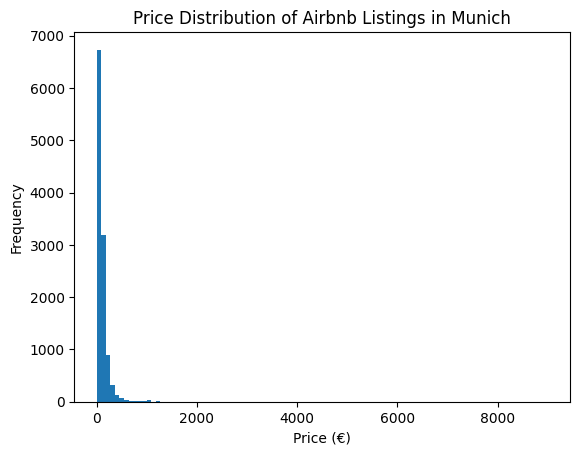

In [27]:
import matplotlib.pyplot as plt

plt.hist(listings['price'], bins=100)
plt.xlabel('Price (€)')
plt.ylabel('Frequency')
plt.title('Price Distribution of Airbnb Listings in Munich')
plt.show()


In [31]:
clean_listings = listings[listings['price'] <= 600].copy()
clean_listings['price'].describe()


count    11379.000000
mean       107.190175
std         82.948123
min          8.000000
25%         55.000000
50%         80.000000
75%        129.000000
max        600.000000
Name: price, dtype: float64

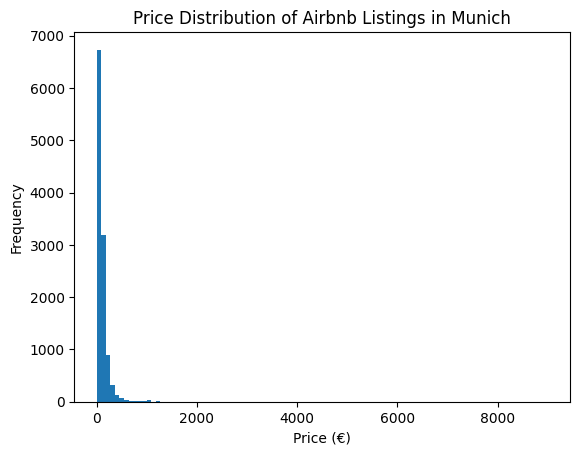

In [33]:
import matplotlib.pyplot as plt

plt.hist(listings['price'], bins=100)
plt.xlabel('Price (€)')
plt.ylabel('Frequency')
plt.title('Price Distribution of Airbnb Listings in Munich')
plt.show()


In [34]:
clean_listings = listings[listings['price'] <= 600].copy()
clean_listings['price'].describe()


count    11379.000000
mean       107.190175
std         82.948123
min          8.000000
25%         55.000000
50%         80.000000
75%        129.000000
max        600.000000
Name: price, dtype: float64

In [35]:
clean_listings['room_type'].value_counts()


room_type
Entire home/apt    6345
Private room       4775
Shared room         182
Hotel room           77
Name: count, dtype: int64

In [36]:
clean_listings.groupby('room_type')['price'].describe()


,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,6345.0,127.036407,91.262164,10.0,69.00,99.0,150.00,600.0
Hotel room,77.0,163.077922,147.523483,45.0,83.00,100.0,135.00,500.0
Private room,4775.0,81.123141,59.295963,8.0,45.00,65.0,100.00,600.0
Shared room,182.0,75.554945,68.185518,10.0,33.25,55.0,94.75,600.0


<Figure size 800x500 with 0 Axes>

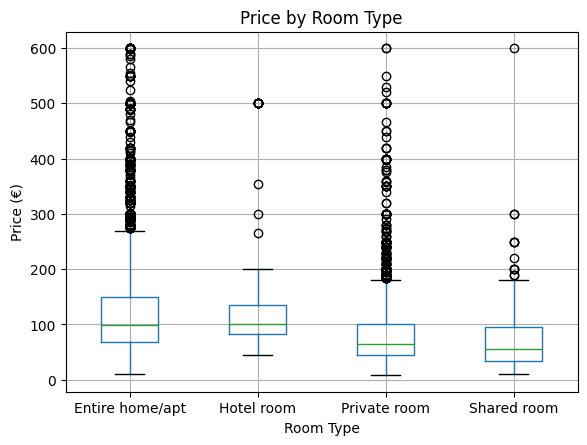

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
clean_listings.boxplot(column='price', by='room_type')
plt.title('Price by Room Type')
plt.suptitle('')
plt.xlabel('Room Type')
plt.ylabel('Price (€)')
plt.show()


In [38]:
clean_listings['neighbourhood_cleansed'].value_counts().head(15)


neighbourhood_cleansed
Ludwigsvorstadt-Isarvorstadt    1189
Maxvorstadt                     1083
Schwabing-West                   861
Neuhausen-Nymphenburg            808
Au-Haidhausen                    766
Schwabing-Freimann               638
Bogenhausen                      521
Milbertshofen-Am Hart            478
Sendling                         457
Ramersdorf-Perlach               439
Schwanthalerhöhe                 431
Laim                             396
Sendling-Westpark                391
Obergiesing                      390
Altstadt-Lehel                   389
Name: count, dtype: int64

In [39]:
neigh_price = (
    clean_listings
    .groupby('neighbourhood_cleansed')['price']
    .agg(['count', 'mean', 'median'])
    .sort_values('mean', ascending=False)
)
neigh_price.head(15)


,count,mean,median
neighbourhood_cleansed,,,
Altstadt-Lehel,389,136.596401,119.0
Ludwigsvorstadt-Isarvorstadt,1189,126.852817,99.0
Schwanthalerhöhe,431,126.431555,100.0
Maxvorstadt,1083,115.016620,90.0
Sendling,457,114.253829,90.0
Au-Haidhausen,766,114.105744,89.0
Tudering-Riem,304,113.101974,79.0
Allach-Untermenzing,73,111.342466,80.0
Aubing-Lochhausen-Langwied,89,106.640449,85.0


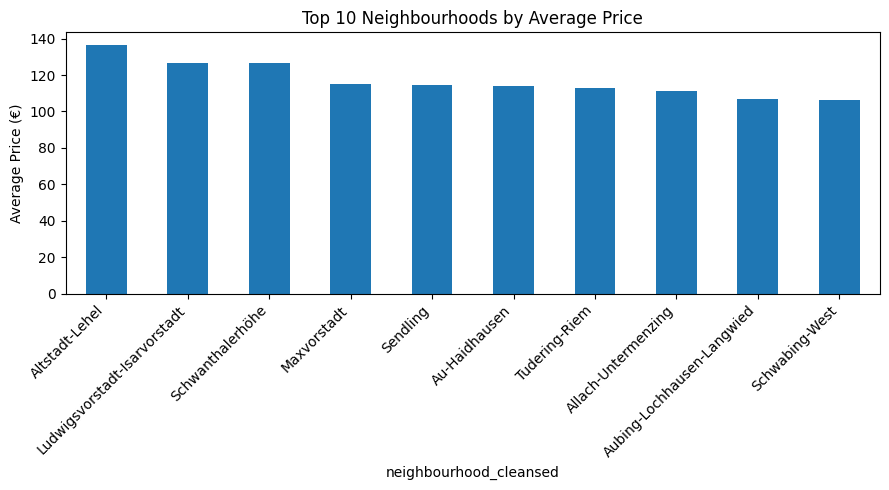

In [40]:
top_neigh = neigh_price.head(10)

plt.figure(figsize=(9, 5))
top_neigh['mean'].plot(kind='bar')
plt.ylabel('Average Price (€)')
plt.title('Top 10 Neighbourhoods by Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [68]:
features_basic = [
    'room_type',
    'property_type',
    'neighbourhood_cleansed',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'availability_365',
    'number_of_reviews',
    'review_scores_rating',
    'host_is_superhost',
    'host_listings_count',
    'latitude',
    'longitude',
    'cancellation_policy',
    'minimum_nights',
    'maximum_nights',
    'number_of_reviews_ltm',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_location',
    'review_scores_value',
    'license'
    'amenities_count',
    'host_response_rate'
]

target = 'price'


In [69]:
clean_listings['reviews_per_year'] = clean_listings['number_of_reviews'] / (clean_listings['host_tenure_days'] / 365)


In [70]:
from sklearn.cluster import KMeans

coords = clean_listings[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=12, random_state=42).fit(coords)
clean_listings['geo_cluster'] = kmeans.labels_


In [71]:
import numpy as np

# 1. Host tenure in days (already done, but run again to be sure)
clean_listings['host_tenure_days'] = (
    clean_listings['last_scraped'] - clean_listings['host_since']
).dt.days

# 2. Fix missing tenure with median
clean_listings['host_tenure_days'] = clean_listings['host_tenure_days'].fillna(
    clean_listings['host_tenure_days'].median()
)

# 3. Add reviews per year feature
clean_listings['reviews_per_year'] = (
    clean_listings['number_of_reviews'] / (clean_listings['host_tenure_days'] / 365)
).replace([np.inf, -np.inf], np.nan).fillna(0)

# 4. Count of amenities (already have, but ensure it exists)
clean_listings['amenities_count'] = clean_listings['amenities'].apply(
    lambda x: len(x.split(',')) if isinstance(x, str) else 0
)

print("Engineered features added.")


Engineered features added.


In [72]:
from sklearn.cluster import KMeans

coords = clean_listings[['latitude', 'longitude']].dropna()

# Fit KMeans (Munich ~ 12 major districts)
kmeans = KMeans(n_clusters=12, random_state=42)
clean_listings.loc[coords.index, 'geo_cluster'] = kmeans.fit_predict(coords)

# Fill any missing clusters with the most common
clean_listings['geo_cluster'] = clean_listings['geo_cluster'].fillna(
    clean_listings['geo_cluster'].mode()[0]
)

print("Geographic clusters added.")


Geographic clusters added.


In [73]:
features = [
    # basic listing features
    'room_type',
    'property_type',
    'neighbourhood_cleansed',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'minimum_nights',
    'maximum_nights',
    'availability_365',
    
    # review features
    'number_of_reviews',
    'number_of_reviews_ltm',
    'reviews_per_year',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_location',
    'review_scores_value',
    
    # host features
    'host_is_superhost',
    'host_listings_count',
    'host_tenure_days',
    
    # engineered
    'amenities_count',
    'geo_cluster',
    
    # location
    'latitude',
    'longitude'
]

target = 'price'


In [74]:
model_data = clean_listings[features + [target]].dropna()
model_data.shape


(11356, 26)

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split

# One-hot encode
data_encoded = pd.get_dummies(model_data, drop_first=True)

X = data_encoded.drop(columns=[target])
y = data_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((9084, 77), (2272, 77))

In [76]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

xgb = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(44.50514221863008, np.float64(67.79697000008787), 0.3599341246052423)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

print("Gradient Boosting:", 
      mean_absolute_error(y_test, y_pred_gbr),
      np.sqrt(mean_squared_error(y_test, y_pred_gbr)),
      r2_score(y_test, y_pred_gbr))


Gradient Boosting: 44.16897493951134 67.1551350522598 0.3719957858862307


: 

: 

: 

: 

: 